### Family Income and Expenditure
#### Analyst: Ryann Kim Sesgundo

> This is just a compliance for our subject ITD (Data Mining) where we need to create atleast 20 analytical insights using the data given. `Some of the analytics 'TITLE' are came from chatgpt`.

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, warnings
warnings.filterwarnings("ignore")

In [2]:
# data = pd.read_csv(f"https://drive.google.com/uc?export=download&id=12Mn2--vxMI_EmKxV3z19r8cf1vExAVH6") # NOTE: For online source
data = pd.read_csv("datasets/Family Income and Expenditure.csv")
data

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


### Filling up all blank values

In [3]:
data['Toilet Facilities'] = data['Toilet Facilities'].fillna("Unknown Toilet Facilities")
data['Household Head Occupation'] = data['Household Head Occupation'].fillna("Unknown Household Head Occupation")
data['Household Head Class of Worker'] = data['Household Head Class of Worker'].fillna("Household Head Class of Worker")

### Polishing data types

In [4]:
def cat(key):
    data[key] = data[key].astype("category")

cat("Region")
cat("Main Source of Income")
cat("Household Head Sex")
cat("Household Head Marital Status")
cat("Household Head Highest Grade Completed")
cat("Household Head Job or Business Indicator")
cat("Household Head Occupation")
cat("Household Head Class of Worker")
cat("Type of Household")
cat("Type of Building/House")
cat("Type of Roof")
cat("Type of Walls")
cat("Tenure Status")
cat("Toilet Facilities")
cat("Main Source of Water Supply")

### 1. Top main source of income in `CAR` or `Cordillera Administrative Region`

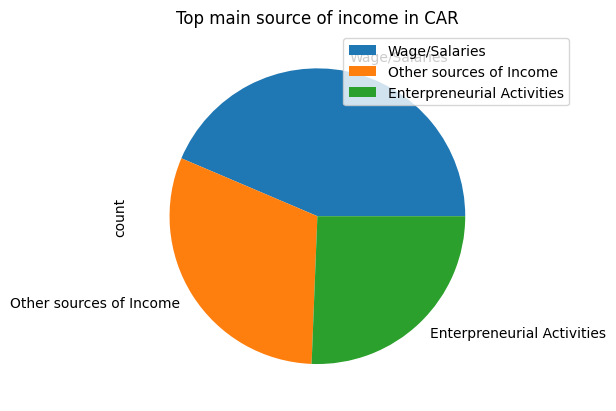

In [5]:
car_region = data[data['Region'] == 'CAR']
top_source_income = car_region['Main Source of Income'].value_counts()
top_source_income.plot(kind='pie')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=10)
plt.title("Top main source of income in CAR")
plt.show()

### 2. Top main source of Income in `NCR` or `National Capital Region` 

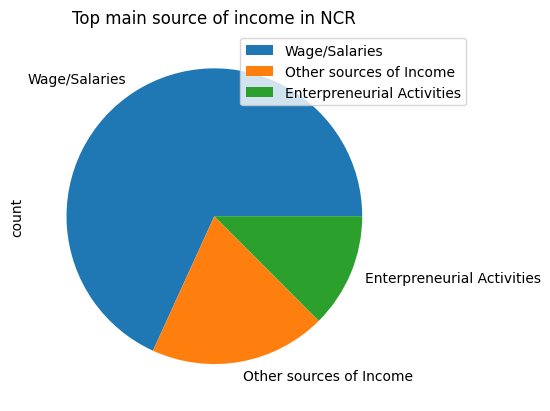

In [6]:
ncr_region = data[data['Region'] == 'NCR']
top_source_income = ncr_region['Main Source of Income'].value_counts()
top_source_income.plot(kind='pie')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=10)
plt.title("Top main source of income in NCR")
plt.show()

### 3. Correlation Between Income and Food Spending

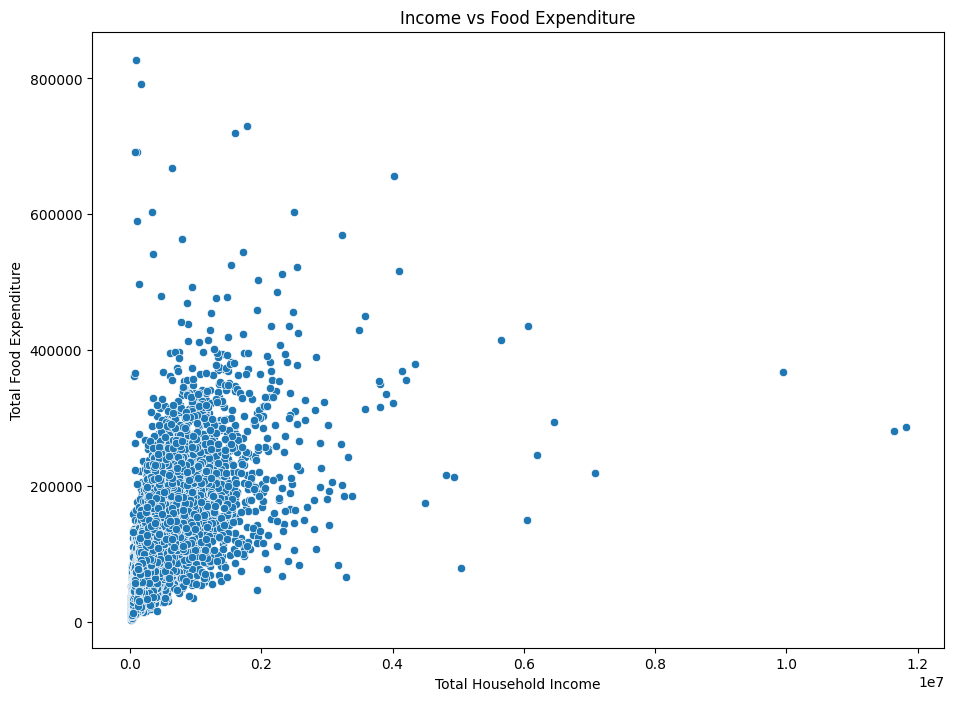

In [28]:
sns.scatterplot(data=data, x='Total Household Income', y='Total Food Expenditure')
plt.gcf().set_size_inches(11, 8)
plt.title('Income vs Food Expenditure')
plt.show()

### 4. Food Category Spending by Income Bracket

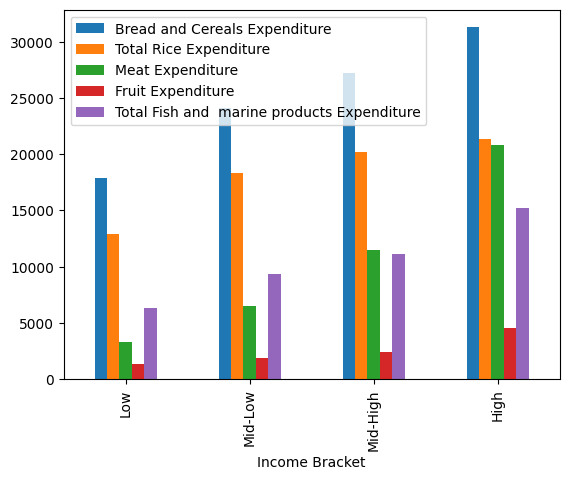

In [22]:
# In pandas, qcut is a function used for quantile-based discretization.
# It divides a dataset into bins based on sample quantiles, ensuring that each bin contains roughly the same number of data points.
# This is particularly useful when dealing with data that is unevenly distributed or when you want to analyze data distribution.
data['Income Bracket'] = pd.qcut(data['Total Household Income'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Average spending by bracket
food_cols = ['Bread and Cereals Expenditure', 'Total Rice Expenditure', 'Meat Expenditure', 'Fruit Expenditure', 'Total Fish and  marine products Expenditure']
bracket = data.groupby('Income Bracket')[food_cols].mean()
bracket.plot(kind="bar")
plt.show()

### 5. Regional Differences in Income and Food Expenditure

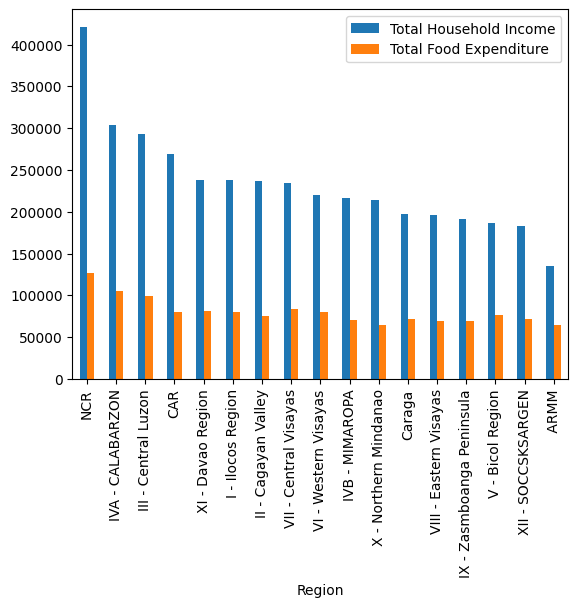

In [27]:
region_stats = data.groupby('Region')[['Total Household Income', 'Total Food Expenditure']].mean().sort_values(by='Total Household Income', ascending=False)
region_stats.plot(kind="bar")
plt.show()

### 6. Income vs Appliance Ownership

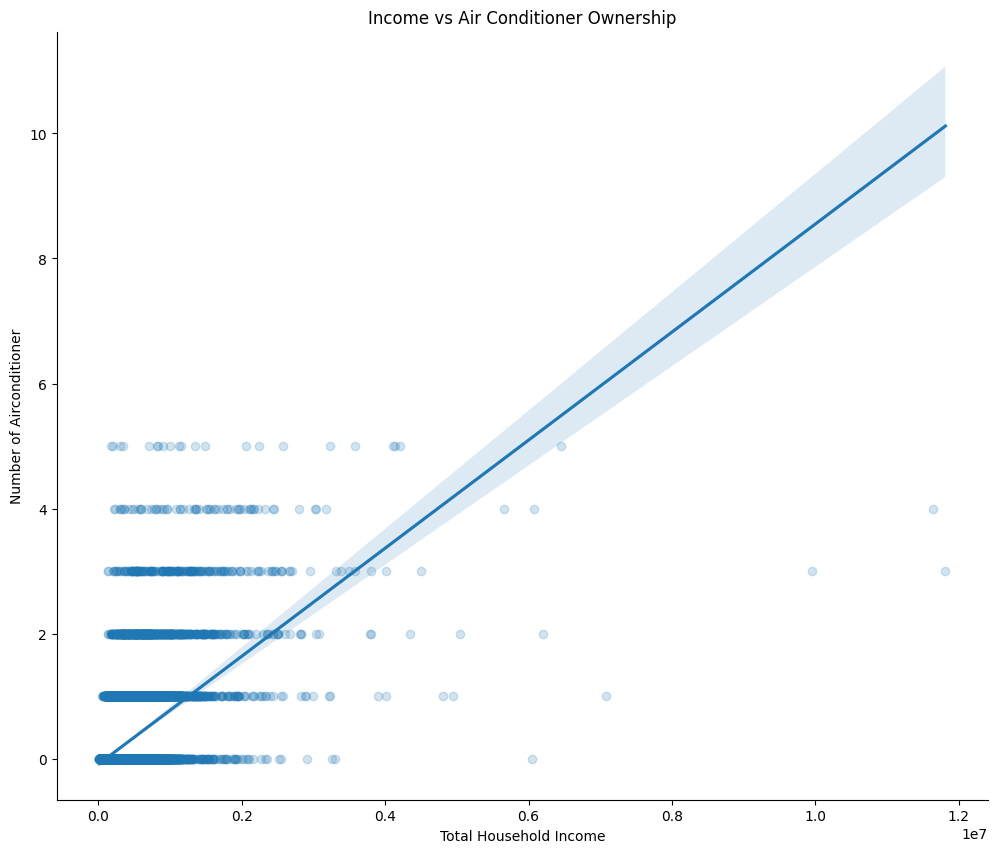

In [47]:
sns.lmplot(data=data, x='Total Household Income', y='Number of Airconditioner', scatter_kws={'alpha':0.2})
plt.title('Income vs Air Conditioner Ownership')
plt.gcf().set_size_inches(11, 9)
plt.show()

### 7. Vehicle Ownership by Income Bracket

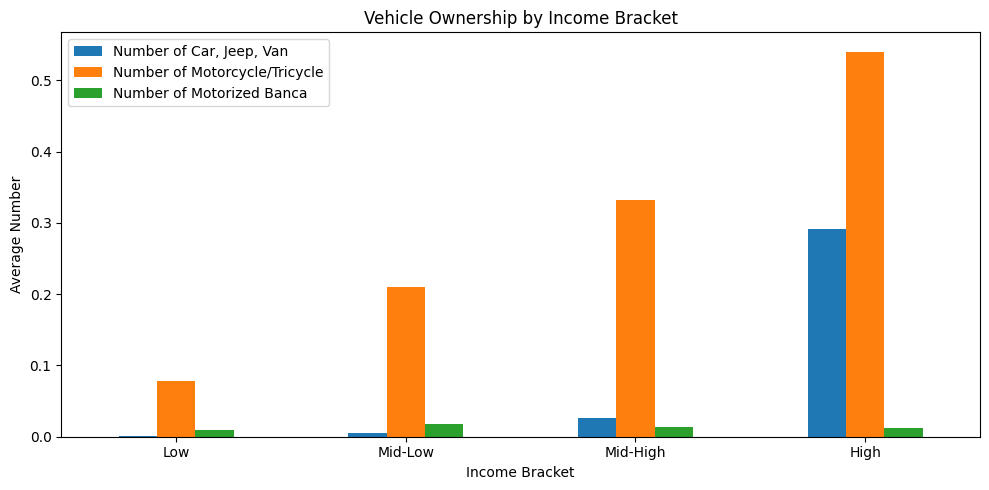

In [36]:
vehicle_cols = ['Number of Car, Jeep, Van', 'Number of Motorcycle/Tricycle', 'Number of Motorized Banca']
data.groupby('Income Bracket')[vehicle_cols].mean().plot(kind='bar', figsize=(10,5), title='Vehicle Ownership by Income Bracket')
plt.ylabel('Average Number')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 8. Cellular Phone vs Landline Ownership by Region

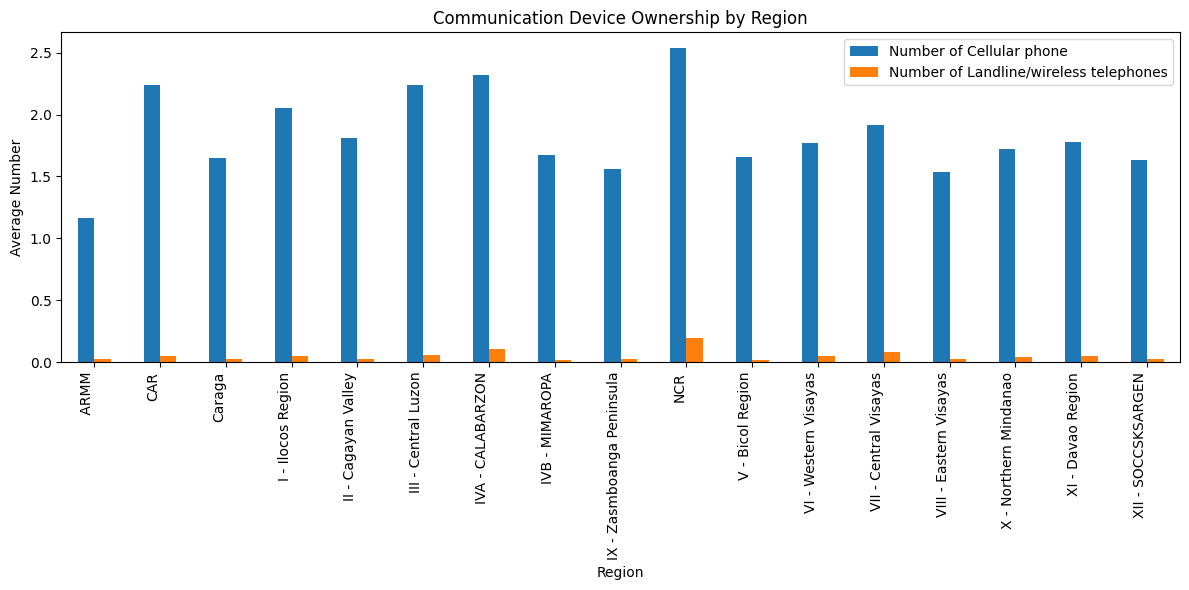

In [46]:
comm_cols = ['Number of Cellular phone', 'Number of Landline/wireless telephones']
data.groupby('Region')[comm_cols].mean().plot(kind='bar', figsize=(12,6))
plt.ylabel('Average Number')
plt.title('Communication Device Ownership by Region')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### 9. Most vehicle availability per region

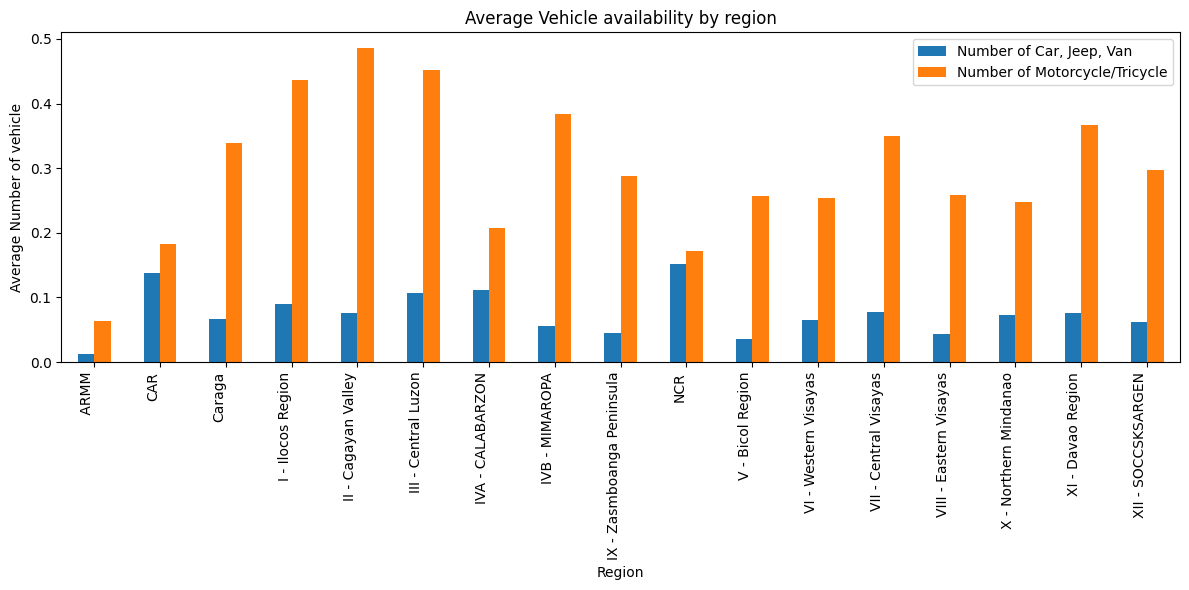

In [67]:
vehicle_cols = ['Number of Car, Jeep, Van', 'Number of Motorcycle/Tricycle']
data.groupby('Region')[vehicle_cols].mean().plot(kind='bar', figsize=(12,6))
plt.ylabel('Average Number of vehicle')
plt.title('Average Vehicle availability by region')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### 10. Average of Household total income by region

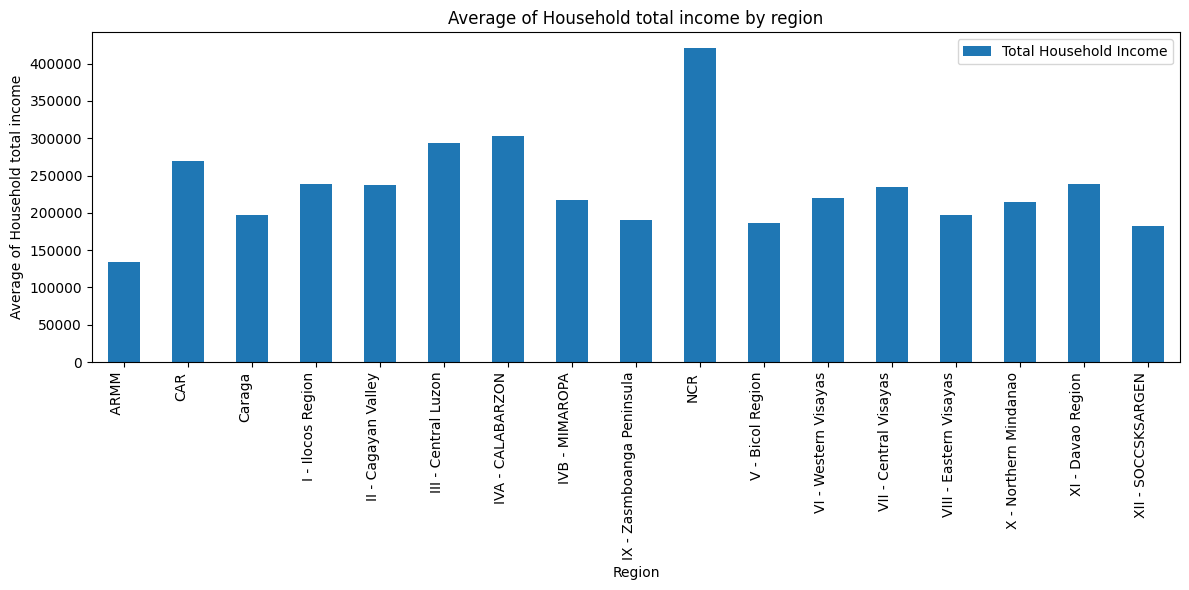

In [66]:
household_cols = ['Total Household Income']
data.groupby('Region')[household_cols].mean().plot(kind='bar', figsize=(12,6))
plt.ylabel('Average of Household total income')
plt.title('Average of Household total income by region')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()